In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Loading the diabetes dataset
diabetes_data = pd.read_csv('diabetess.csv')

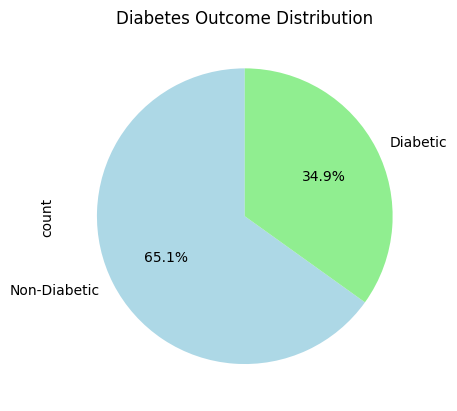

In [3]:
# a) Pie chart for patient outcomes (diabetic vs non-diabetic)
diabetes_data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], labels=['Non-Diabetic', 'Diabetic'])
plt.title('Diabetes Outcome Distribution')
plt.show()

In [4]:
# b) Handling missing values
# Mean for BMI
diabetes_data.fillna({'BMI': diabetes_data['BMI'].mean()}, inplace=True)

In [5]:
# Median for BloodPressure
diabetes_data.fillna({'BloodPressure': diabetes_data['BloodPressure'].median()}, inplace=True)

In [6]:
# Mode for Insulin
diabetes_data.fillna({'Insulin': diabetes_data['Insulin'].mode()[0]}, inplace=True)

In [7]:
# Additional missing value handling with inplace=True
# Mean for Glucose
diabetes_data.fillna({'Glucose': diabetes_data['Glucose'].mean()}, inplace=True)

# Median for SkinThickness
diabetes_data.fillna({'SkinThickness': diabetes_data['SkinThickness'].median()}, inplace=True)

# Check again if there are still any missing values in the dataset
print(diabetes_data.isnull().sum())  # This should print 0 for all columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


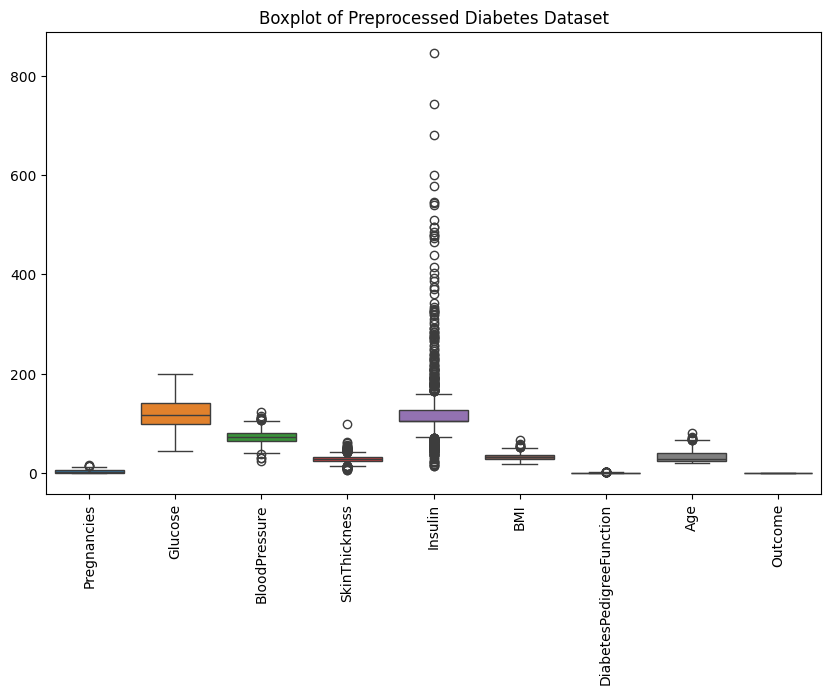

In [8]:
# c) Boxplot of the pre-processed dataset
plt.figure(figsize=(10,6))
sns.boxplot(data=diabetes_data)
plt.title('Boxplot of Preprocessed Diabetes Dataset')
plt.xticks(rotation=90)
plt.show()

In [9]:
# d) Comparing ML Models (Logistic Regression, SVM, and Decision Tree)
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [12]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [13]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
# Printing accuracy of models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.7402597402597403
SVM Accuracy: 0.7402597402597403
Decision Tree Accuracy: 0.7012987012987013


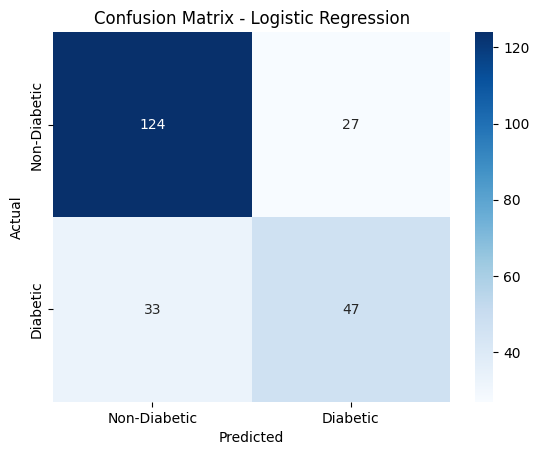

In [15]:
# e) Confusion Matrix for one of the models (Logistic Regression example)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()